In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
mainFile =pd.read_csv('drive/My Drive/Colab Notebooks/Travel Pony Facebook.csv')
mainFile.head()

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857


In [0]:
mainFile = mainFile[mainFile['Amount Spent (USD)'] != 0.00]

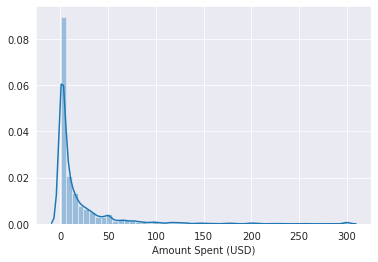

In [0]:
sns.set_style('darkgrid')
sns.distplot(mainFile['Amount Spent (USD)'])

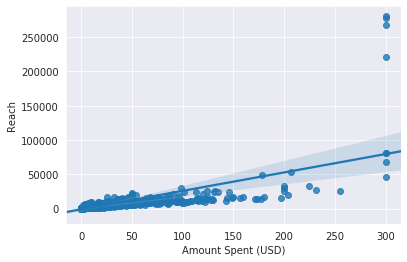

In [0]:
sns.regplot(x=mainFile["Amount Spent (USD)"], y=mainFile["Reach"], fit_reg=True)


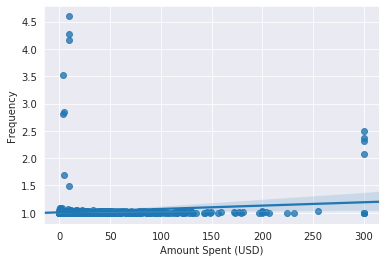

In [0]:
sns.regplot(x=mainFile["Amount Spent (USD)"], y=mainFile["Frequency"], fit_reg=True)

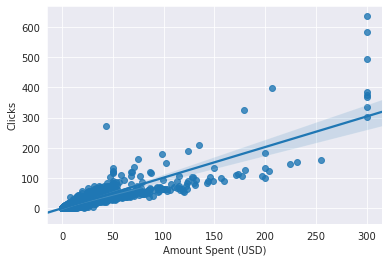

In [0]:
sns.regplot(x=mainFile["Amount Spent (USD)"], y=mainFile["Clicks"], fit_reg=True)

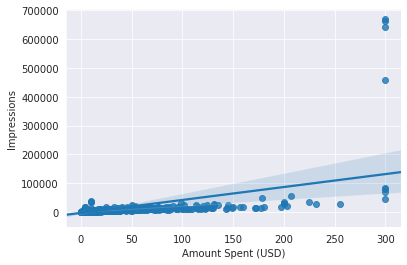

In [0]:
sns.regplot(x=mainFile["Amount Spent (USD)"], y=mainFile["Impressions"], fit_reg=True)

In [0]:
varr = mainFile[["Amount Spent (USD)",'Reach', 'Frequency',"Impressions","Clicks","Unique Clicks","Page Likes","Page Engagement","Post Engagement","Post Likes","Post Comments","Post Shares","Website Clicks"]].copy()
varr.head()
dummies = pd.get_dummies(mainFile.iloc[:,3])
regg = varr.join(dummies)
regg.head()

,Amount Spent (USD),Reach,Frequency,Impressions,Clicks,Unique Clicks,Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Website Clicks,Ad 1,Cyber Weekend,Nanigans_2_637,Nanigans_2_638,Nanigans_2_639,Nanigans_2_640,Nanigans_2_641,Nanigans_2_642,Nanigans_2_643,Nanigans_2_644,Nanigans_2_645,Nanigans_2_646,Nanigans_2_647,Nanigans_2_648,Nanigans_2_651,Nanigans_2_652,Nanigans_2_653,Nanigans_2_654,Nanigans_2_655,Nanigans_2_656,Nanigans_2_659,Nanigans_2_660,Nanigans_2_661,Nanigans_2_662,Nanigans_2_663,Nanigans_2_664,Nanigans_2_669,...,Simple_Multi_Fill_Campaign_2_558,Simple_Multi_Fill_Campaign_2_559,Simple_Multi_Fill_Campaign_2_560,Simple_Multi_Fill_Campaign_2_561,Simple_Multi_Fill_Campaign_2_562,Simple_Multi_Fill_Campaign_2_563,Simple_Multi_Fill_Campaign_2_564,Simple_Multi_Fill_Campaign_2_565,Simple_Multi_Fill_Campaign_2_566,Simple_Multi_Fill_Campaign_2_567,Simple_Multi_Fill_Campaign_2_568,Simple_Multi_Fill_Campaign_2_569,Simple_Multi_Fill_Campaign_2_575,Simple_Multi_Fill_Campaign_2_579,Simple_Multi_Fill_Campaign_2_583,Simple_Multi_Fill_Campaign_2_596,Simple_Multi_Fill_Campaign_2_597,Simple_Multi_Fill_Campaign_2_598,Simple_Multi_Fill_Campaign_2_599,Simple_Multi_Fill_Campaign_2_600,Simple_Multi_Fill_Campaign_2_601,Simple_Multi_Fill_Campaign_2_602,Simple_Multi_Fill_Campaign_2_603,Simple_Multi_Fill_Campaign_2_617,Simple_Multi_Fill_Campaign_2_619,Simple_Multi_Fill_Campaign_2_620,Simple_Multi_Fill_Campaign_2_621,Simple_Multi_Fill_Campaign_2_622,Simple_Multi_Fill_Campaign_2_623,Simple_Multi_Fill_Campaign_2_624,Simple_Multi_Fill_Campaign_2_626,Simple_Multi_Fill_Campaign_2_627,Simple_Multi_Fill_Campaign_2_631,Simple_Multi_Fill_Campaign_2_633,Simple_Multi_Fill_Campaign_2_634,Simple_Multi_Fill_Campaign_2_636,TravelPony: Conversion Test,TravelPony: General Ads,Travelpony-Page Likes-US-13-65,http://travelpony...-Clicks-US-13-65
0,300.00,278117,2.314303,643647,336,313,3,246,243,0,0,0,243,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,300.00,221255,2.079090,460009,376,348,6,215,209,0,0,0,209,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,300.00,267915,2.499069,669538,383,345,2,252,250,0,0,0,250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,300.00,280332,2.365406,663099,301,275,3,257,254,0,0,0,254,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,35.18,14269,1.000420,14275,64,61,2,14,12,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
target = regg.iloc[:,0]
dep = regg.iloc[:,1:395]
mod=sm.OLS(target,dep)
ols = mod.fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:     Amount Spent (USD)   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     78.55
Date:                Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                        00:06:24   Log-Likelihood:                -6125.9
No. Observations:                1802   AIC:                         1.304e+04
Df Residuals:                    1408   BIC:                         1.521e+04
Df Model:                         393                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------